# Visualization in Pandas


There are numerous libraries available in Python for creating vizualizations. Often times, we will probably be using [Matplotlib](http://matplotlib.org/) and/or [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) for anything that is general purpose, and then other libraries if we need something more specialized ([Plotly](https://plot.ly/) for dashboards, for example). All of these libraries allow us to build great looking visualizations that can be used in a production setting. If we want something quick and dirty to visualize our data very easily, there is also some plotting functionality built into Pandas. 

If we look at the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), we can see that the plotting available with Pandas will be called via the `plot()` method on a DataFrame object. From there, we'll pass in a bunch of potential arguments to the `plot()` method to specify exactly how to build the plot. The most important of those arguments is the `kind` keyword argument, which tells the `plot()` method what kind of visualization we would like (bar plot, histogram, scatter plot, etc.). Most of the time we'll be doing your visualization in Matplotlib or Seaborn, but here is a little taste of what Pandas can do so that you know it's there. 

A dataset on the [quality of red wines](https://archive.ics.uci.edu/ml/datasets/wine+quality) is used for this purpose. You already got to know this data set in the last notebook. Now we will try to get an even better feel for the dataset with the help of some plots. At the end of the notebook, there are some tasks where you should  create some plots with pandas. 

## Learning Objectives

At the end of this notebook you will be able to:

- create plots with the Pandas function `.plot()`
- describe the different kinds of plots (eg. histograms, scatterplots, bar plots and box plots)
- explain what conclusions you draw from these visualizations

First, we need to import pandas and our dataframe.


In [4]:
import pandas as pd
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)

In [7]:
df.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)

In [8]:
df.eval('total_acidity = fixed_acidity + volatile_acidity', inplace = True)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'total_acidity'],
      dtype='object')

We have several input variables; they are based on physicochemical tests: 
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

And there is one output variable, based on sensory data:
- 12 - quality (which is a score between 0 and 10)

To get a good overview of the data, we want to draw some histograms. We can visualize this with the argument `kind= 'hist'`. We also need to specify which density distribution to draw, so we need to name a particular column. The output variable, the quality of the wine, seems to be the most interesting, so we plot it first.

<AxesSubplot:ylabel='Frequency'>

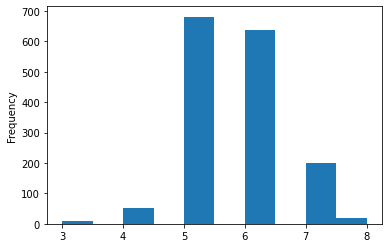

In [9]:
# specify a certain column and call the pandas plot function
df['quality'].plot(kind='hist')

You can see, thatthe red wines in this dataset have quality scores from 3 to 8. So we neither have very bad quality wines nor wines with the best quality scores. The score 5 is given most times. Nearly 700 wines have gotten this score.

Also other plots can be made with the plot function. Next we try scatterplots, where we have to specify a feature for the X and Y column. And set `kind='scatter'`.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

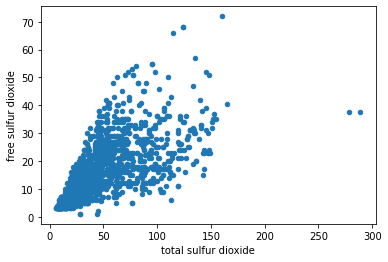

In [10]:
# As you might guess from the error, we have to specify X and Y columns for Pandas to plot. 
df.plot(kind='scatter', x='total sulfur dioxide', y='free sulfur dioxide')

This is what scatter plots for continuous variables look like. You can see that when the total sulfur dioxide increases, the free sulfur dioxide also increases.
It is also interesting to see how different features affect the quality of red wines. Quality is a discrete variable, so don't be surprised that the plot looks different.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

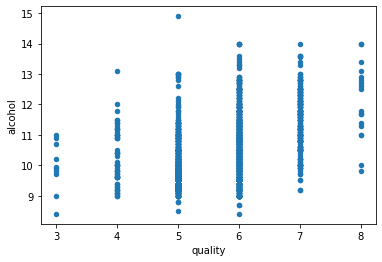

In [11]:
df.plot(kind='scatter', x='quality', y='alcohol')

This might not be the best plot to draw many conclusions, but at least we see, that wines with higher quality do not have low alcohol concentrations.

The next type of plot we want to look at are boxplots. As histograms, they should give us a better impression on the distribution of the data.

<AxesSubplot:>

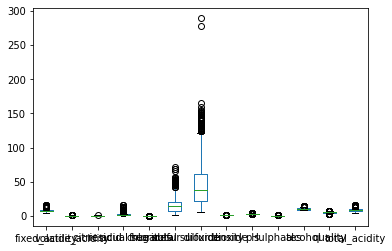

In [12]:
df.plot(kind='box')

For most of the features we cannot disinguish their distribution, this is due to the different scales of the features. Therefore, it is necessary to specify only some columns and see how that looks...


<AxesSubplot:>

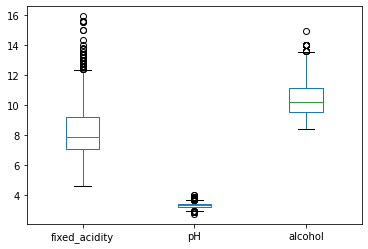

In [13]:
df[['fixed_acidity', 'pH', 'alcohol']].plot(kind='box')

<AxesSubplot:>

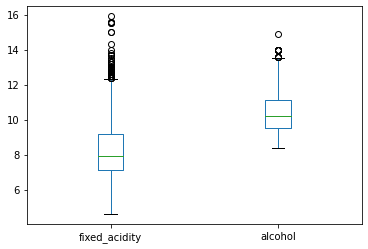

In [14]:
# This still doesn't look great - it's hard to really examine these three columns since pH is 
# so different from the other two. Let's drop pH and try one more time...
df[['fixed_acidity', 'alcohol']].plot(kind='box')

## Check your understanding

Now it's time to try plotting. Check out the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization) and try out different types of plots. See if you find any interesting new insights into the data.

After that, there are some specific tasks to test your knowledge.

**Practice with plotting**
1. Plot the average amount of `chlorides` for each `quality` value (1 from Part 3). 
2. Plot the `alcohol` values against `pH` values. Does there appear to be any relationship between the two?
3. Plot `total_acidity` values against `pH` values. Does there appear to be any relationship between the two?
4. Plot a histogram of the `quality` values. Are they evenly distributed within the data set?
5. Plot a boxplot to look at the distribution of `citric acid`. 

<AxesSubplot:ylabel='Frequency'>

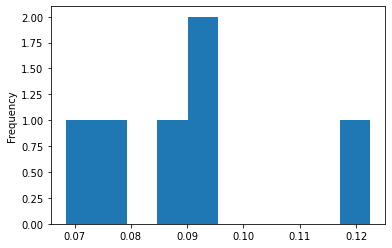

In [15]:
df.groupby(["quality"]).mean()['chlorides'].plot(kind="hist")

<AxesSubplot:xlabel='pH', ylabel='alcohol'>

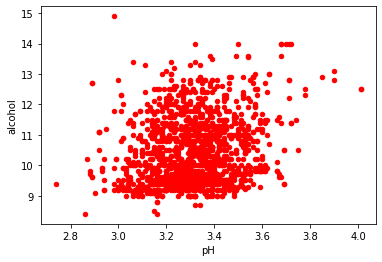

In [16]:
df.plot(kind='scatter', x='pH', y='alcohol', color = "red")

<AxesSubplot:xlabel='pH', ylabel='total_acidity'>

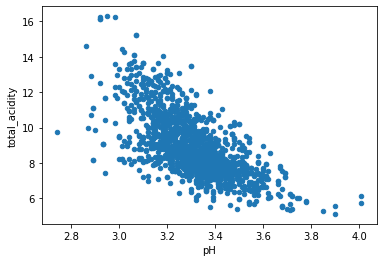

In [72]:
df.plot(kind='scatter', x='pH', y='total_acidity')

<AxesSubplot:ylabel='Frequency'>

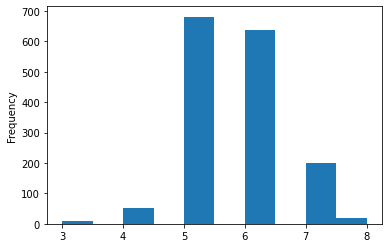

In [73]:
df['quality'].plot(kind='hist')

<AxesSubplot:>

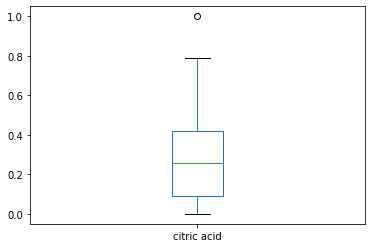

In [75]:
df[['citric acid']].plot(kind='box')